# **Milestone 1**

## **Context**
 - Why is this problem important to solve?

### **The objectives:**

 - What is the intended goal?

###**The key questions:**

- What are the key questions that need to be answered?



###**The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC.

**Power** : The maximum power of the engine in bhp.

**Seats** : The number of seats in the car.

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [44]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

### **Let us load the data**

In [114]:
data = pd.read_csv('used_cars.csv')

### **Understand the data by observing a few rows**

In [46]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [47]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


#### **Observations and Insights: _____**

Top 5 rows have all fields populated with data except New_Price, while bottom 5 rows do not have data for New_Price and Price columns (NaN); Max price from top 5 is 17.74 lac RS, while lowest is 1.75 - a wide range of price. Most of the cities in the data is Mumbai(Bombay), then Hyderababd and Chennai. Kolkata, Pune, Kochi and Coimbatore came once. Most of the cars have Diesel as Fuel type(60%), then Petrol (gas) and then CNG. The oldest model found is 2010, while the newest is 2015. 

### **Let us check the data types and and missing values of each column** 

In [48]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [49]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7249,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7250,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7251,False,False,False,False,False,False,False,False,False,False,False,False,True,True


#### **Observations and Insights: _____**

We see 7253 non-null values fo S.No, to owner_type, and 7207 non-null power data, 7200 non-null seats data, 1006 non-null New_Price, and 6019 used Price data; other data is NAN. Name, Location, Fuel Type, Transmission, and Owner_type are of Object types(string values), while rest of the columns gave Int64 (Integer) or float64 (floating point, real) data. These are numeric columns in otheword.  Memory used by data is 793KB. The True in the data shown by isnull() function indicates missing data values, top 5 rows and bottom 5 rows have been shown above with "True" values in the New_Price and Price columns.

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence it can be dropped.

In [115]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop('S.No.', inplace=True, axis=1)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [51]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


#### **Observations and Insights: _____**

The S.No. column has been removed(not showing up in the result of describe() function); there is total 7253 used cars in the data set; mean of year is 2013, with a std of 3.25 (in years); min value 1996. 25% quartile falls withing 2011, while 50th quartile falls within 2014, and 75% to 2016. The rest of the cars are newer than 2016 model. The latest model found was 2019.  Highest of KM drive is 6.500000e+06 (seems data error), while 75th quartile value is 73,000. Highest mileasge is 33km/gallon. Highest power is 616 BHP, min 34 BHP. Lowest price found in 0.44 lac, while the highest iss 160 lac RS (this could be an outlier), 75% quartile values is approx 10 lac RS. The maximum capaciy is 10 seat, while avg is 5 seats, and min is 2. 

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [ ]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include=['object'] 

**Number of unique observations in each category**

In [52]:
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].value_counts())
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Typ

#### **Observations and Insights: _____**

The output shows uniques values of count for columns, Name, Location, Fuel_Type, and Transmission. Name column list the Brand name of the user cars with number of cars available, while Location column shows city names and how many used cars available; the Fuel_Type column shows Fuel name and count of cars using those, and Transmission column shows owners (First, Second, Third etc) with pertinent used cars belonging before to those owners.

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [53]:
#Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: _____**
Descending order sorting shown above with top 10 rows, we find that the highest driven car is BMW X5 xDrive 30d M Sport, while Skoda Octavia is on the second and Volkswagen Vento is on the third on the list. The highest drive car was from Chennai, and Year of the model was from 2017. The price for this car is still very high (65 lac RS), while the lowest one in the list is only 1 lac RS for Tata Indigo. Tata Indigo falls into the most affordable car category, I would think. However, this has quite a high KM Driven, 300,000. Maruti has the highest Mileage (23.4) above, though is not the highest as not all data is available here for Mileage category (not sorted by Mileage here). 


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [54]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
#df.drop(['c', 'd'], inplace = True )
data.drop([2328],inplace = True )

**Check Mileage extreme values**

In [55]:
#Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage', ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [56]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.

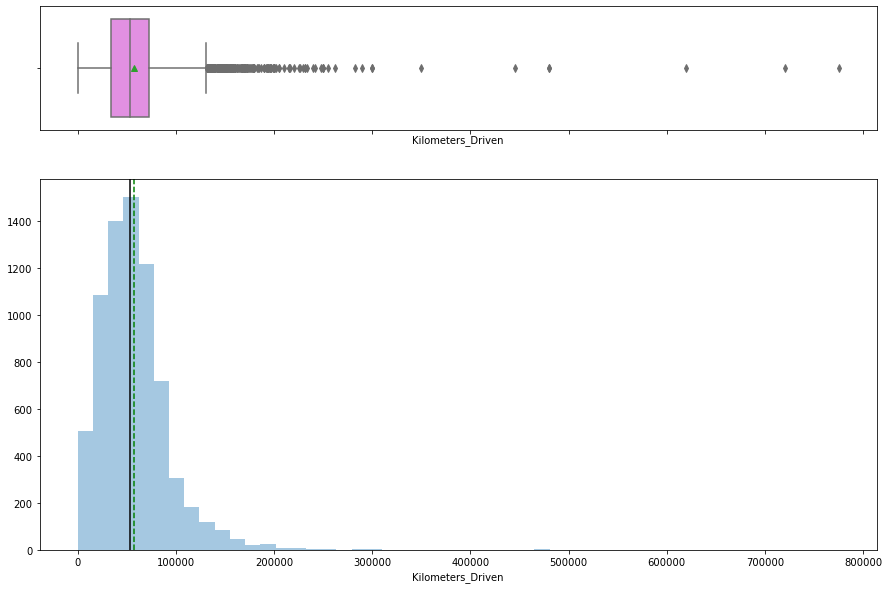

In [57]:
#Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

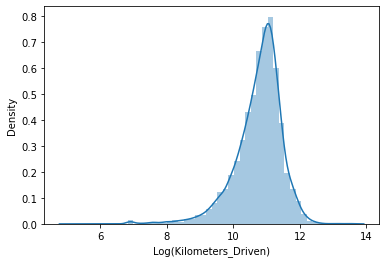

In [58]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");

#### **Observations and Insights: _____**
The original Kilometer driven data was skewed to the right; however, the logarithmic transformation removed some of that skewness. This hides or smoothes out the presentation of data, making it much more presentable.

In [59]:
### We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**

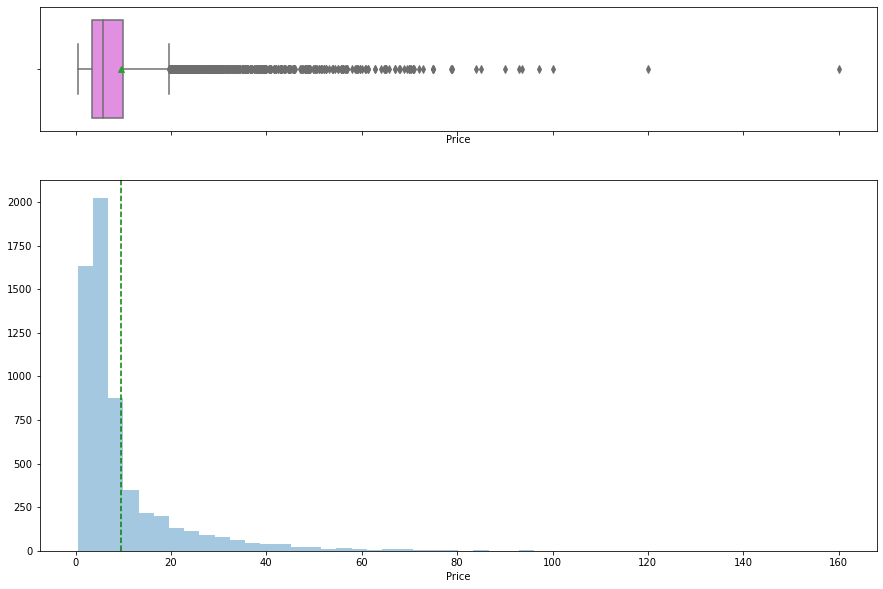

In [60]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

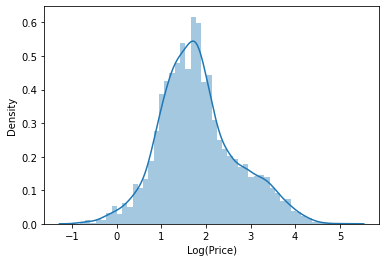

In [61]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel="Log(Price)");
 


In [62]:
# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])
 

#### **Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

#### **Observations and Insights for all the plots: _____**
The original price data was skewed to the right; however, the logarithmic transformation removed some of that skewness from Price data as well. This hides or smoothes out the presentation of data, and graph looks much less skewed now.




## **2. Univariate analysis - Categorical Data**

In [63]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    
    plt.show() # show the plot

#### Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.

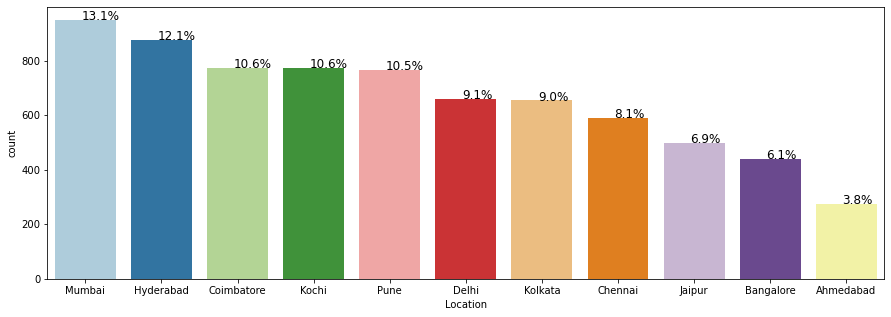

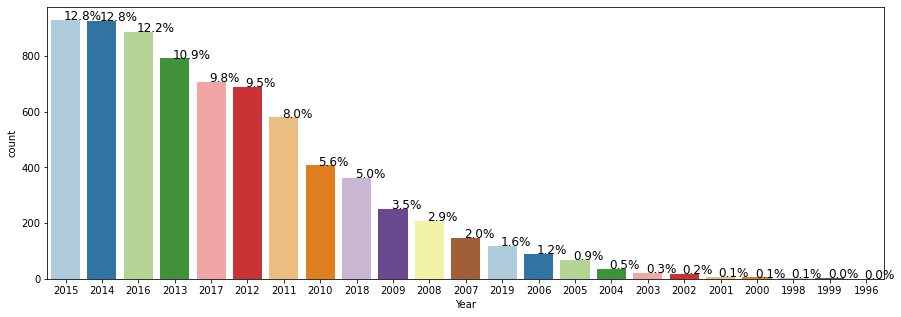

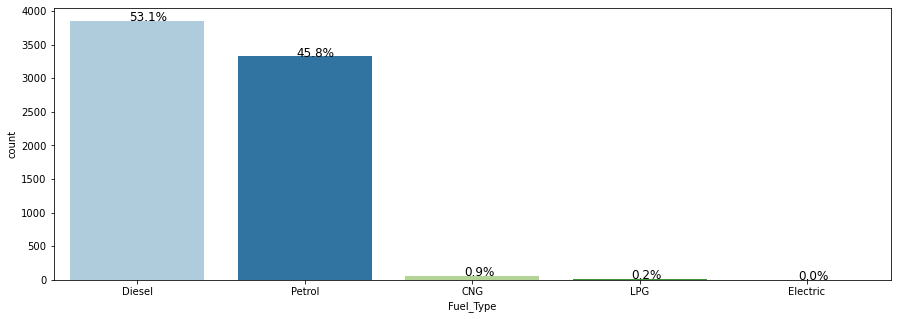

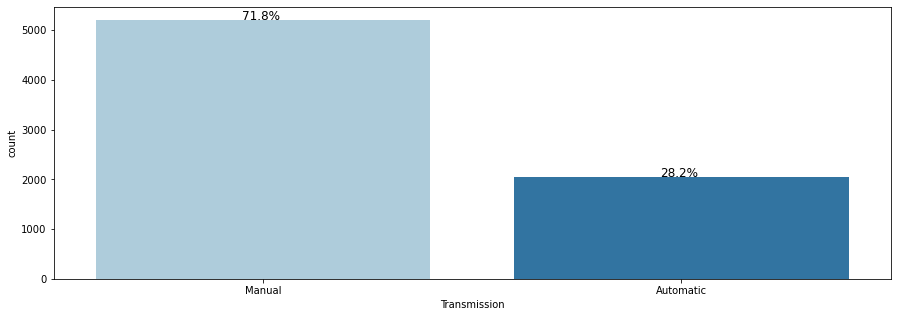

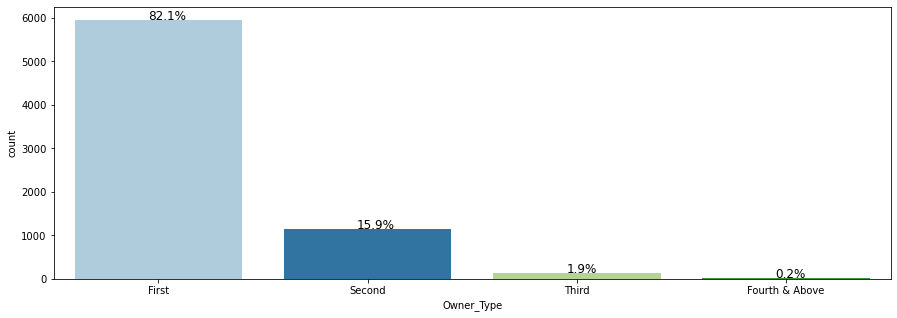

In [34]:
#Bar Plot for 'Location'
perc_on_bar('Location')

#Bar Plot for 'Year'
perc_on_bar('Year')

#Bar Plot for 'Fuel_Type'
perc_on_bar('Fuel_Type')


#Bar Plot for 'Transmission'
perc_on_bar('Transmission')


#Bar Plot for 'Owner_Type'
perc_on_bar('Owner_Type')



#### **Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`

#### **Observations and Insights from all plots: _____**

The First bar chart above shows the Percentages of used cars sold/bought by major citis in India; Mubmai is the top city for this, while Hyderabad and Coimbatore stand 2nd and third respectively; these 3 cities together has the 36% of the total used cars of India sold/purchased. The other major cities and Kochi, Pune, Delhi, Kolkata, Chennai, Jaipur, Bangalore and Ahmedabad.

The Second bar chart shows Year info as x-axis, and count of used cars on y-axis; we see most of the used cars are from 2015, 2014, 2016 and 2013 (double digit percentages) followed by 2017, 2012, 2010 to 2007; 2019 has a small percentage as well. All other years have 1% or less.

The Third bar chart shows the percentage of cars by Fuel Type, and we see 53% used cars have Diesel, 46% have Petrol and the rest have CNG as fuel. 

The Fourth bar chart shows the the percentage of used cars with manual and automatic transmissions - we see 71% of used cars have manual transmission while the rest have automatic transmission.

For the owner types, 82% used cars have owner before, and 16% have two owners before, and only 2% have three or more previous owners.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='price_log'>

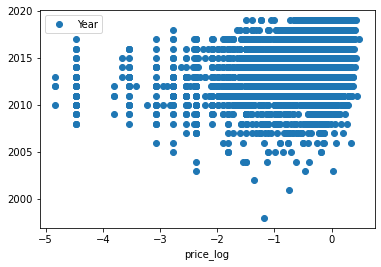

In [42]:
#Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x='price_log', y='Year', style='o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

#### **Observations and Insights from all plots: _____**
The pair plot shows more dots toward the lower values of price log (towards 0) withing 2006 to 2019 years, which makes sense; the plot is more catchy to human eyes and shows clearly the zone where most of the data points (dots) belong to. 


### **2. Heat map**
Heat map shows a 2D correlation matrix between two discrete features

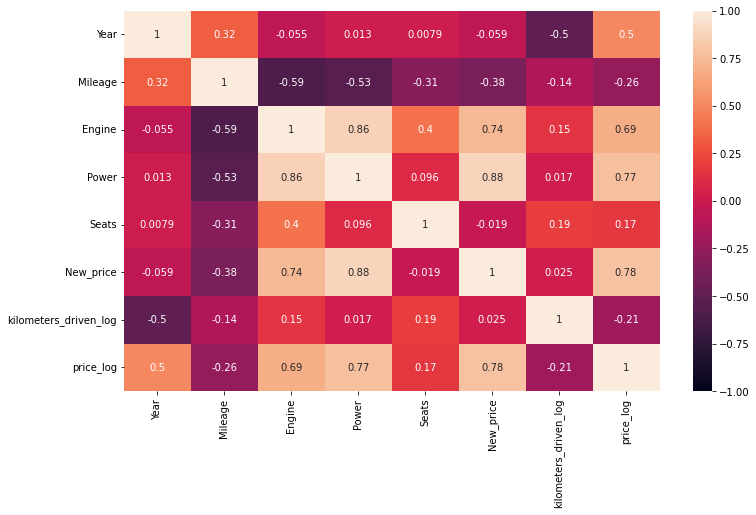

In [64]:
#We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven', 'Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

**Observations and Insights: _____**

The hightest positive correlation is 0.88 which happened for Power and New_Price (new cars, more money, more power); Power and Engine has high correlation as well (0.86). The New_Price and Engine are also positively correlated. The hibhest negative correlation of -0.53 happened between power and mileage; more powerful the car is, the less mileage it gives, burns a lot of fuels for the power. The same is true for Seats and Mileage (-0.31), between New_Price and Mileage (-0.38). The price_log and New_price are positively correlated at 78% which makes sense; the higher the new car price, the corresponding used car will have higher resale value in general. 

### **3. Box plot**

In [65]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

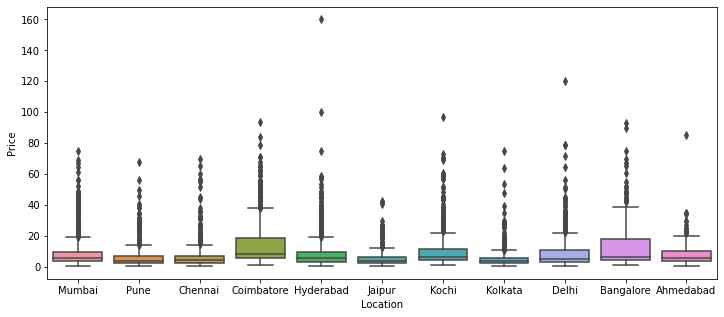

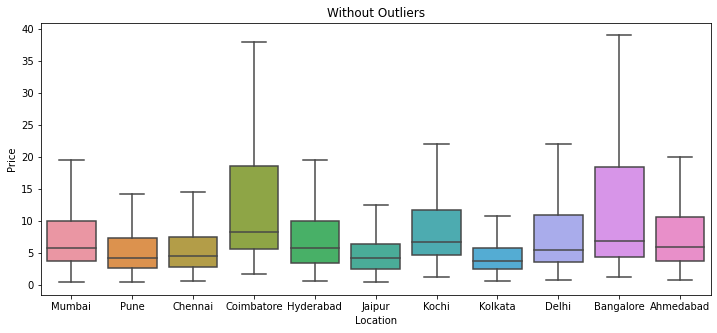

In [66]:
#Box Plot:Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots**


### **Feature engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

#### **Observations and Insights: _____**
This is bivariate analysis ... with Price and Location as shown above. I did not get enough time to explore other cases of Categorical variables like Fuel_Type, Transmission, Owner_type etc. The boxplot removing outliers is more clear and presentable.

### **Missing value treatment**

In [116]:
# Now check the missing values of each column. Hint: Use isnull() method

col=['Name', 'Location', 'Year', 'Fuel_Type','Transmission','Kilometers_Driven', 'Owner_Type', 'Seats', 'Engine','Power','Mileage','Price', 'New_price']
print (data[col].isnull().sum())
 

Name                    0
Location                0
Year                    0
Fuel_Type               0
Transmission            0
Kilometers_Driven       0
Owner_Type              0
Seats                  53
Engine                 46
Power                 175
Mileage                 2
Price                1234
New_price            6247
dtype: int64


#### **Observations and Insights: _____**
All major attributes (Name, Location, Year, Fuel_Type, Transmission, KM drive have non-null data. Other attributes have NULL data, and New_price has most of those, and Price has 1234 of null values. ALl remaining attributes have some null data.

**Missing values in Seats**

In [117]:
# Checking missing values in the column 'Seats'
col=['Seats']
print (data[col].isnull().sum())
 

Seats    53
dtype: int64


**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name


In [118]:
# Impute missing values in Seats,you can use fillna method in pandas
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])


In [119]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
col=['Seats']
print (data[col].isnull().sum())

Seats    0
dtype: int64


**Missing values for Mileage**

In [120]:
# Now check missing values of each column. Hint: Use isnull() method

col=['Name', 'Location', 'Year', 'Fuel_Type','Transmission','Kilometers_Driven', 'Owner_Type', 'Seats', 'Engine','Power','Mileage','Price', 'New_price']
print (data[col].isnull().sum())

Name                    0
Location                0
Year                    0
Fuel_Type               0
Transmission            0
Kilometers_Driven       0
Owner_Type              0
Seats                   0
Engine                 46
Power                 175
Mileage                 2
Price                1234
New_price            6247
dtype: int64


In [121]:
# Impute missing Mileage. For example use can use median or any other methods.

data['Mileage'] = data['Mileage'].fillna(data['Mileage'].mode()[0])

In [122]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
col=['Mileage']
print (data[col].isnull().sum())

Mileage    0
dtype: int64


**Missing values for Engine**

In [123]:
col=['Engine']
print (data[col].isnull().sum())

Engine    46
dtype: int64


**Missing values for Power**

In [124]:
col=['Power']
print (data[col].isnull().sum())

Power    175
dtype: int64


**Missing values for New_price**

In [125]:
col=['New_price']
print (data[col].isnull().sum())

New_price    6247
dtype: int64


#### **Observations for missing values after imputing: _____**

After imputing, the NaN values for those fields (the ones were asked for Imputing) were replaced by mode values from other rows of data in the data set for those columns. This is one way of removing missing data from the data set. 

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?